In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math
from dataset import Dataset
%matplotlib inline

In [15]:
def zoomUnit(act,indexFilter):
    return act[0,:,:,indexFilter]

def showAllFilters(act):
    print "Plotting layer with shape ",act.shape
    nFilters = act.shape[3]


    filter = 0
    rows = int(np.ceil(nFilters*1.0/5))
    print rows
    for i in range(rows):
        fig, grid = plt.subplots(1, 5)
        for j in range(5):
            if filter >= nFilters:
                break
            grid[j].imshow(act[0,:,:,filter],interpolation='none')
            filter+=1

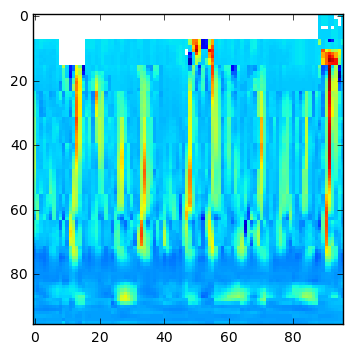

In [18]:
#Load image
dataset = Dataset("data/Scalograms", batch_size=20)
pathImageTest = "data/Scalograms/1_0.jpg"

#Load image and prepare for input
imageToUse=cv2.cvtColor(cv2.imread(pathImageTest), cv2.COLOR_BGR2GRAY)
imageToUse = dataset.normalizeImage(imageToUse)
plt.imshow(imageToUse, interpolation="nearest")
imageToUse = imageToUse.reshape((1, 96, 96, 1))

Plotting layer with shape  (1, 96, 96, 64)
13
Output layer  [[  2.41172981  15.64016247]]


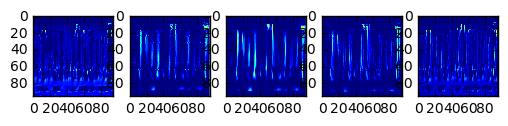

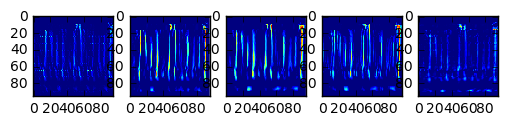

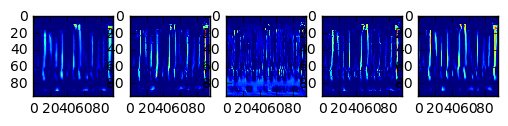

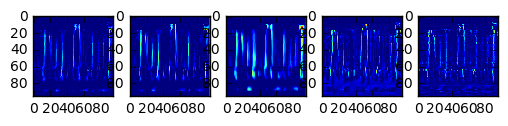

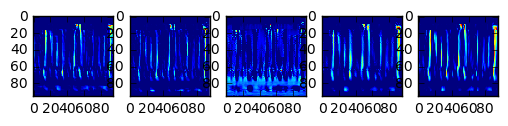

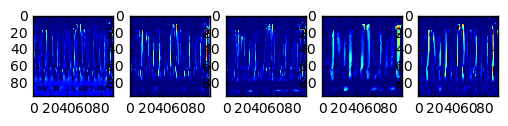

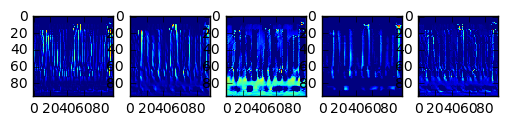

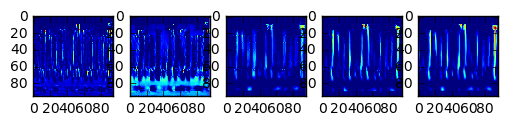

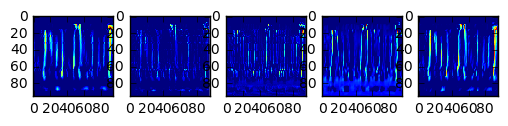

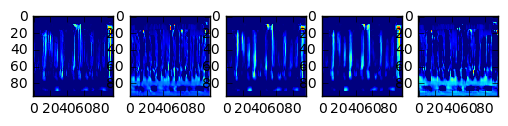

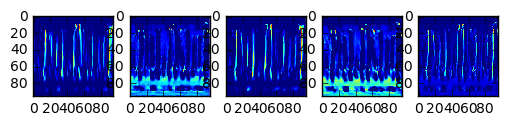

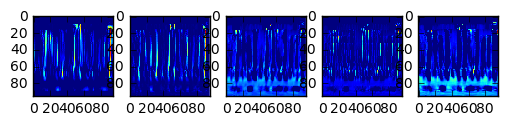

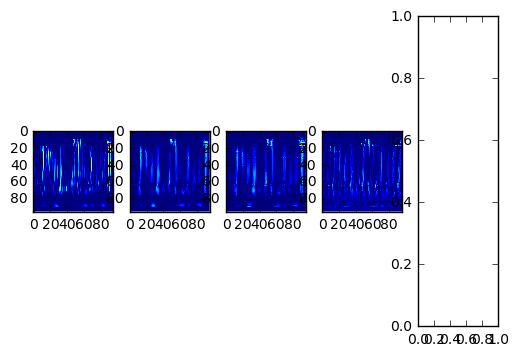

In [19]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('savedModels/my-model.meta')
    new_saver.restore(sess, 'savedModels/my-model')
    md = sess.graph.get_tensor_by_name('model_input:0')
    kp = sess.graph.get_tensor_by_name('dropout_prob:0')

    #Layer visualization
    tosee = 'conv1/Relu:0'
    unit = sess.graph.get_tensor_by_name(tosee)

    v_ = sess.run((unit), feed_dict={md: imageToUse,kp:1.0})
    showAllFilters(v_)

    #Output layer
    ot = sess.run((sess.graph.get_tensor_by_name('fc2/Relu:0')), feed_dict={md: imageToUse,kp:1.0})
    print "Output layer ",ot

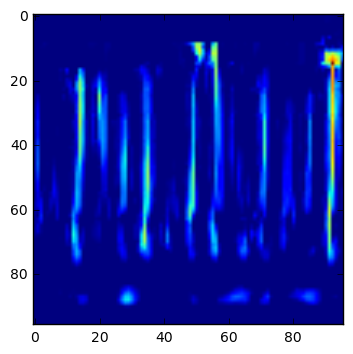

In [20]:
plt.figure()
plt.imshow(zoomUnit(v_,2))